In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
!pip install feature-engine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydan

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df_clf = pd.DataFrame(data.data,columns=data.feature_names)
df_clf['diagnostic'] = pd.Series(data.target)
df_clf = df_clf.sample(frac=0.6, random_state=101)
# add some missing data
df_clf.iloc[:10,4] = np.NaN

print(df_clf.shape)
df_clf.head()

(341, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
107,12.36,18.54,79.01,466.7,NaN,0.06815,0.02643,0.01921,0.1602,0.06066,...,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185,1
437,14.04,15.98,89.78,611.2,NaN,0.05895,0.03534,0.02944,0.1714,0.05898,...,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234,1
195,12.91,16.33,82.53,516.4,NaN,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949,1
141,16.11,18.05,105.10,813.0,NaN,0.11370,0.09447,0.05943,0.1861,0.06248,...,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,0
319,12.43,17.00,78.60,477.3,NaN,0.03454,0.01342,0.01699,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,1


In [6]:
df_target = df_clf[['diagnostic']]
X = df_clf.drop(['diagnostic'], axis=1)
print(X.shape)
X.head(3)

(341, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
107,12.36,18.54,79.01,466.7,NaN,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185
437,14.04,15.98,89.78,611.2,NaN,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
195,12.91,16.33,82.53,516.4,NaN,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.1506,0.1764,0.08235,0.3024,0.06949


In [7]:
from sklearn.pipeline import Pipeline
### Data Cleaning
from feature_engine.imputation import MeanMedianImputer
### Feat Scaling
from sklearn.preprocessing import StandardScaler


def PipelineDataCleaningFeatEngFeatScaling():
  pipeline_base = Pipeline([
                            
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='median') ),

      ( 'feature_scaling', StandardScaler() ),
  ])

  return pipeline_base

PipelineDataCleaningFeatEngFeatScaling()

Pipeline(steps=[('MeanMedianImputer', MeanMedianImputer()),
                ('feature_scaling', StandardScaler())])

In [8]:
pipeline_pca = PipelineDataCleaningFeatEngFeatScaling()
df_pca = pipeline_pca.fit_transform(X)
print(df_pca.shape,'\n', type(df_pca))

(341, 30) 
 <class 'numpy.ndarray'>


In [9]:
df_pca

array([[-0.56738473, -0.16536585, -0.59933184, ..., -0.50820136,
         0.1792575 , -0.63049085],
       [-0.07141397, -0.77390549, -0.13893309, ..., -0.66545513,
        -0.27508597, -0.60317217],
       [-0.40501335, -0.69070671, -0.44885797, ..., -0.54111494,
         0.25145937, -0.76206648],
       ...,
       [ 2.35825232,  0.10324735,  2.55506217, ...,  2.77647856,
         2.06707222,  0.82130135],
       [-0.88031867, -0.24856463, -0.81649299, ...,  0.08615112,
         0.75158939,  2.59478483],
       [ 0.34779941, -1.74614265,  0.40482476, ...,  1.0544782 ,
         0.58957544,  0.99469128]])

In [10]:
import numpy as np
from sklearn.decomposition import PCA # import PCA from sklearn

n_components = 30 # set the number of components as all columns in the data

pca = PCA(n_components=n_components).fit(df_pca)  # set PCA object and fit to the data
x_PCA = pca.transform(df_pca) # array with transformed PCA


# the PCA object has .explained_variance_ratio_ attribute, which tells 
# how much information (variance) each component has 
# We store that to a DataFrame relating each component to its variance explanation
ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_ ,2),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

# prints how much of the dataset these components explain (naturally in this case will be 100%)
PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)

* The 30 components explain 100.0% of the data 

              Explained Variance Ratio (%)
Component 0                          43.68
Component 1                          18.48
Component 2                          10.31
Component 3                           6.72
Component 4                           5.88
Component 5                           3.86
Component 6                           2.44
Component 7                           1.63
Component 8                           1.31
Component 9                           1.05
Component 10                          0.96
Component 11                          0.84
Component 12                          0.73
Component 13                          0.42
Component 14                          0.34
Component 15                          0.26
Component 16                          0.23
Component 17                          0.22
Component 18                          0.14
Component 19                          0.11
Component 20                          0.09
Compo

In [11]:
# same code just changed the number of components
n_components = 7

pca = PCA(n_components=n_components).fit(df_pca)
x_PCA = pca.transform(df_pca) # array with transformed PCA

ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_ ,2),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)

* The 7 components explain 91.37% of the data 

             Explained Variance Ratio (%)
Component 0                         43.68
Component 1                         18.48
Component 2                         10.31
Component 3                          6.72
Component 4                          5.88
Component 5                          3.86
Component 6                          2.44


In [12]:
print(x_PCA.shape)
x_PCA

(341, 7)


array([[-3.19632096, -0.7882415 , -1.54280305, ..., -0.31482589,
         0.25021347, -0.14958942],
       [-2.15148256, -0.97430915,  0.45730527, ...,  0.43744131,
        -0.18081375,  0.0783528 ],
       [-2.81567468, -0.67506773, -0.47638179, ...,  0.0187848 ,
         0.84195774,  0.40380846],
       ...,
       [13.25075397,  0.68891084,  0.36451787, ...,  1.0003148 ,
         0.78704341, -0.10109186],
       [ 1.2548625 ,  4.93892792, -1.0380955 , ..., -1.71789741,
         1.0133776 , -1.24697795],
       [ 2.83513614,  1.09372726, -2.33467669, ...,  0.15095285,
        -0.77420664,  0.15741655]])

## Visualise data after PCA transformation

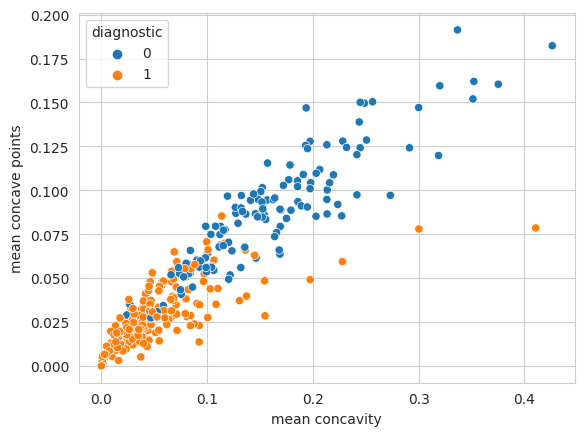

In [13]:
var1, var2 = 'mean concavity' , 'mean concave points'
sns.scatterplot(x=X[var1], y=X[var2], hue=df_target['diagnostic'])
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

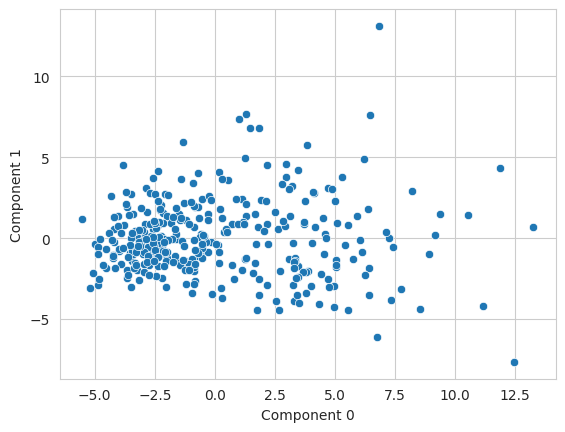

In [14]:
sns.scatterplot(x=x_PCA[:,0], y=x_PCA[:,1])
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

In [15]:
import plotly.express as px
fig = px.scatter_3d(x=x_PCA[:,0], y=x_PCA[:,1], z= x_PCA[:,2] , color=df_target['diagnostic'],
                    labels=dict(x="Component 0", y="Component 1", z='Component 2'),
                    color_continuous_scale='spectral',
                    width=750, height=500)
fig.update_traces(marker_size=5)
fig.show()